<a href="https://colab.research.google.com/github/sonlam137216/comment-social-data/blob/main/comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
!pip install underthesea

from underthesea import text_normalize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 44.7 MB/s eta 0:00:00


In [ ]:
!pip install pyvi

from pyvi import ViTokenizer, ViPosTagger

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 39.3 MB/s eta 0:00:00


In [ ]:
# Download stopwords and lemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
my_file = open('./sample_data/vietnamese-stopwords.txt', 'r')

# reading the file
data = my_file.read()

# replacing end splitting the text
# when newline ('\n') is seen.
stop_words = data.split("\n")
print(stop_words)
my_file.close()

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy', 'ai đó', 'alô', 'amen', 'anh', 'anh ấy', 'ba', 'ba ba', 'ba bản', 'ba cùng', 'ba họ', 'ba ngày', 'ba ngôi', 'ba tăng', 'bao giờ', 'bao lâu', 'bao nhiêu', 'bao nả', 'bay biến', 'biết', 'biết bao', 'biết bao nhiêu', 'biết chắc', 'biết chừng nào', 'biết mình', 'biết mấy', 'biết thế', 'biết trước', 'biết việc', 'biết đâu', 'biết đâu chừng', 'biết đâu đấy', 'biết được', 'buổi', 'buổi làm', 'buổi mới', 'buổi ngày', 'buổi sớm', 'bà', 'bà ấy', 'bài', 'bài bác', 'bài bỏ', 'bài cái', 'bác', 'bán', 'bán cấp', 'bán dạ', 'bán thế', 'bây bẩy', 'bây chừ', 'bây giờ', 'bây nhiêu', 'bèn', 'béng', 'bên', 'bên bị', 'bên có', 'bên cạnh', 'bông', 'bước', 'bước khỏi', 'bước tới', 'bước đi', 'bạn', 'bản', 'bản bộ', 'bản riêng', 'bản thân', 'bản ý', 'bất chợt', 'bất cứ', 'bất giác', 'bất kì', 'bất kể', 'bất kỳ', 'bất luận', 'bất ngờ', 'bất nhược', 'bất quá', 'bất quá chỉ', 'bất thình lình', 'bất tử', 'bất đồ', 'bấy', 'bấy chầy', 'bấy chừ', 'bấy giờ', 'bấy lâu', 'bấy lâ

In [ ]:
import re

def strip_emoji(text):
    RE_EMOJI = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    return RE_EMOJI.sub(r'', text)

In [ ]:
# Load the CSV file
data = pd.read_csv('./sample_data/final.csv')

In [ ]:
# Preprocessing the comments
lemmatizer = WordNetLemmatizer()

In [ ]:
acronym_mapping = {
    'tg': 'thời gian',
    'hn': 'Hà Nội',
    'hcm': 'Hồ Chí Minh',
    'k': 'không',
    'r': 'rồi',

    'mn': 'mọi người' ,
    'mng': 'mọi người',
    'ng': 'người',
    'vs': 'với' ,
    'zs': 'với' ,
    'ko': 'không' ,
    'kh': 'không' ,
    'k0': 'không',
    'sp': 'sản phẩm' ,
    'spham': 'sản phẩm',
    'cskh': 'chăm sóc khách hàng' ,
    'v': 'vậy' ,
    'đc': 'được' ,
    'dc': 'được',
    'ncl': 'nói chung là' ,
    'nchung': 'nói chung',
    'nma': 'nhưng mà' ,
    'nm': 'nhưng mà',
    'nhm': 'nhưng mà',
    'e': 'em',
    'trg': 'trong',
    'mik': 'mình' ,
    'nthe': 'như thế',
    'ntn': 'như thế này',
    'tnay': 'thế này',
    'ktrang': 'khẩu trang' ,
    's': 'sao' ,
    'trc': 'trước' ,
    'ks': 'không sao' ,
    'h': 'giờ',
    'nx': 'nữa',
    'bth': 'bình thường',
    'đou': 'đâu',
    'kb': 'không biết',
    'trl': 'trả lời',
    'cs': 'có',
    'tr': 'trời',
    'ktra': 'kiểm tra',
    'ngta': 'người ta',
    'dth': 'dễ thương',
    'fb': 'facebook',
    'ny': 'người yêu',
    'kbh': 'không bao giờ',
    'sđt': 'số điện thoại',
    'cg': 'cũng',
    'lm': 'lắm',
    'tk': 'tài khoản',
    'bn': 'bạn',
    'th': 'thôi',
    'cbi': 'chuẩn bị',
    'nt': 'nhắn tin',
    'ts': 'tới',
    'dvu': 'dịch vụ',
    'nvay': 'như vậy',
    'hssv': 'học sinh sinh viên',
    'kp': 'không phải',
    'sd': 'sử dụng',

    'mk': 'mà',
    'ns': 'nói',
    'cx': 'cũng',
    'hỉu': 'hiểu'

}

def preprocess(comment):
    # Lowercase the comment
    comment = comment.lower()

    # Remove icon
    comment = strip_emoji(comment)

    # Text Normalization using underthesea
    comment = text_normalize(comment)

    # Remove punctuation and special characters
    comment = ''.join(char for char in comment if char.isalnum() or char.isspace())

    # Tokenize the comment
    tokens = ViTokenizer.tokenize(comment)

    # Replace acronyms with standard expansions
    tokens = [acronym_mapping.get(token, token) for token in tokens.split()]

    # Remove stop words and lemmatize the remaining words
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and ViPosTagger.postagging(token)[1][0] != 'Np']

    # Join the tokens back into a single string
    processed_comment = ' '.join(tokens)

    return processed_comment

# Apply preprocessing to the comments
data['processed_comment'] = data['Content'].apply(preprocess)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['processed_comment'], data['Classify'], test_size=0.2, random_state=42)

In [ ]:
# Create the TF-IDF vectorizer
tfidfVectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidfVectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidfVectorizer.transform(X_test)

In [ ]:
# Create the CountVectorizer vectorizer
countVectorizer = CountVectorizer()

# Fit and transform the training data
X_train_countvectorizer = countVectorizer.fit_transform(X_train)

# Transform the testing data
X_test_countvectorizer = countVectorizer.transform(X_test)

TF-IDF Report
              precision    recall  f1-score   support

           0       0.30      0.25      0.27       179
           1       0.59      0.63      0.61       295
           2       0.67      0.68      0.68       409

    accuracy                           0.58       883
   macro avg       0.52      0.52      0.52       883
weighted avg       0.57      0.58      0.57       883

CountVectorizer Report
              precision    recall  f1-score   support

           0       0.34      0.37      0.36       179
           1       0.68      0.68      0.68       295
           2       0.71      0.68      0.69       409

    accuracy                           0.62       883
   macro avg       0.58      0.58      0.58       883
weighted avg       0.62      0.62      0.62       883

TF-IDF


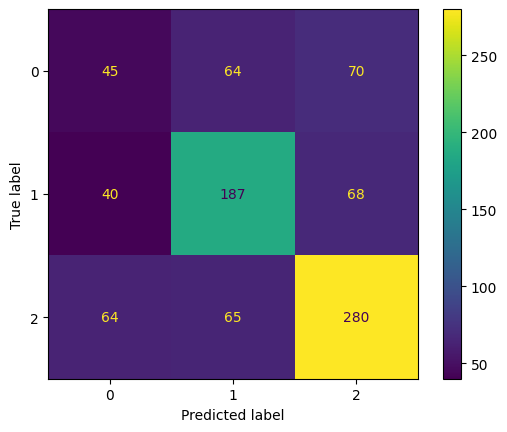

CountVectorizer


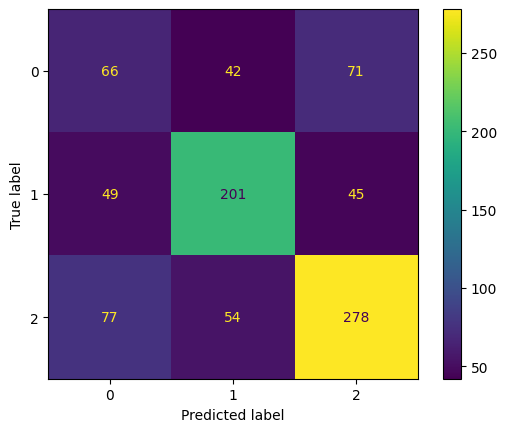

In [ ]:
# Decision Tree classifier pineline with TF-IDF and CountVectorizer
decisionTree_Tfidf_Classifier = DecisionTreeClassifier()
decisionTree_Countvectorizer_Classifier = DecisionTreeClassifier()

# Train the classifier TF-IDF
decisionTree_Tfidf_Classifier.fit(X_train_tfidf, y_train)

# Train the classifier CountVectorizer
decisionTree_Countvectorizer_Classifier.fit(X_train_countvectorizer, y_train)

# Make predictions on the testing data with TF-IDF
classifier_Tfidf_Predictions = decisionTree_Tfidf_Classifier.predict(X_test_tfidf)

# Make predictions on the testing data with CountVectorizer
classifier_Countvectorizer_Predictions = decisionTree_Countvectorizer_Classifier.predict(X_test_countvectorizer)

# Print classification report TF-IDF
print('TF-IDF Report')
print(classification_report(y_test, classifier_Tfidf_Predictions))

# Print classfication report CountVectorizer
print('CountVectorizer Report')
print(classification_report(y_test, classifier_Countvectorizer_Predictions))

print('TF-IDF')
decision_cm_tfidf = confusion_matrix(y_test, classifier_Tfidf_Predictions)
decision_disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=decision_cm_tfidf, display_labels=decisionTree_Tfidf_Classifier.classes_)

decision_disp_tfidf.plot()

plt.show()

print('CountVectorizer')
decision_cm_cv = confusion_matrix(y_test, classifier_Countvectorizer_Predictions)
decision_disp_cv = ConfusionMatrixDisplay(confusion_matrix=decision_cm_cv, display_labels=decisionTree_Countvectorizer_Classifier.classes_)

decision_disp_cv.plot()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TF-IDF Report
              precision    recall  f1-score   support

           0       0.48      0.25      0.33       179
           1       0.75      0.77      0.76       295
           2       0.71      0.85      0.77       409

    accuracy                           0.70       883
   macro avg       0.65      0.62      0.62       883
weighted avg       0.68      0.70      0.68       883

CountVectorizer Report
              precision    recall  f1-score   support

           0       0.46      0.34      0.39       179
           1       0.74      0.77      0.75       295
           2       0.74      0.80      0.77       409

    accuracy                           0.70       883
   macro avg       0.65      0.64      0.64       883
weighted avg       0.68      0.70      0.69       883

TF-IDF


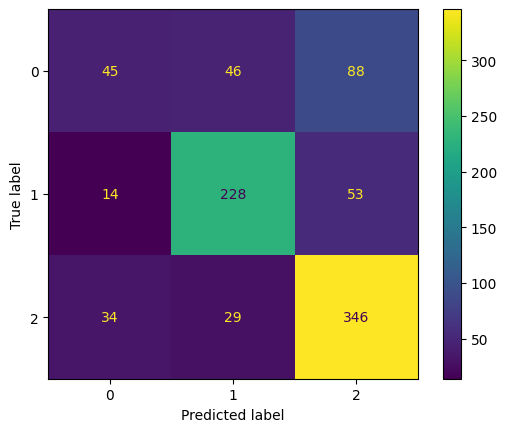

CountVectorizer


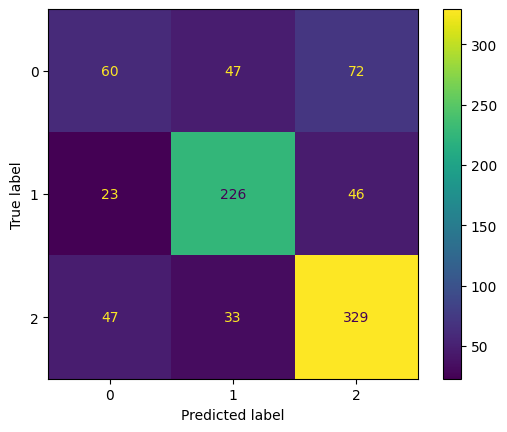

In [ ]:
# Logistic regression model pineline with TF-IDF and CountVectorizer
logisticRegression_Tfidf_Model = LogisticRegression()
logisticRegression_CountVectorizer_Model = LogisticRegression()

# Train model TF-IDF
logisticRegression_Tfidf_Model.fit(X_train_tfidf, y_train)

# Train model CountVectorizer
logisticRegression_CountVectorizer_Model.fit(X_train_countvectorizer, y_train)


# Make predictions on testing data TF-IDF
logisticRegression_Tfidf_Predictions = logisticRegression_Tfidf_Model.predict(X_test_tfidf)

# Make predictions on testing data CountVectorizer
logisticRegression_CountVectorizer_Predictions = logisticRegression_CountVectorizer_Model.predict(X_test_countvectorizer)

# Print classification report TF-IDF
print('TF-IDF Report')
print(classification_report(y_test, logisticRegression_Tfidf_Predictions))

# Print classification report CountVectorizer
print('CountVectorizer Report')
print(classification_report(y_test, logisticRegression_CountVectorizer_Predictions))

print('TF-IDF')
logistic_cm_tfidf = confusion_matrix(y_test, logisticRegression_Tfidf_Predictions)
logistic_disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=logistic_cm_tfidf, display_labels=logisticRegression_Tfidf_Model.classes_)

logistic_disp_tfidf.plot()

plt.show()

print('CountVectorizer')
logistic_cm_cv = confusion_matrix(y_test, logisticRegression_CountVectorizer_Predictions)
logistic_disp_cv = ConfusionMatrixDisplay(confusion_matrix=logistic_cm_cv, display_labels=logisticRegression_CountVectorizer_Model.classes_)

logistic_disp_cv.plot()

plt.show()

TF-IDF Report
              precision    recall  f1-score   support

           0       0.50      0.21      0.29       179
           1       0.75      0.76      0.75       295
           2       0.69      0.87      0.77       409

    accuracy                           0.70       883
   macro avg       0.65      0.61      0.61       883
weighted avg       0.67      0.70      0.67       883

CountVectorizer Report
              precision    recall  f1-score   support

           0       0.54      0.21      0.31       179
           1       0.75      0.72      0.74       295
           2       0.68      0.88      0.77       409

    accuracy                           0.69       883
   macro avg       0.66      0.60      0.60       883
weighted avg       0.68      0.69      0.66       883

TF-IDF


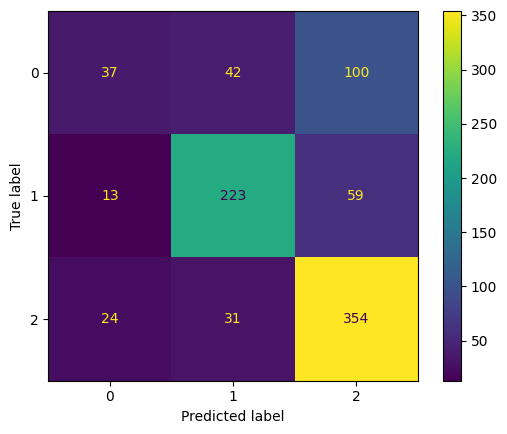

CountVectorizer


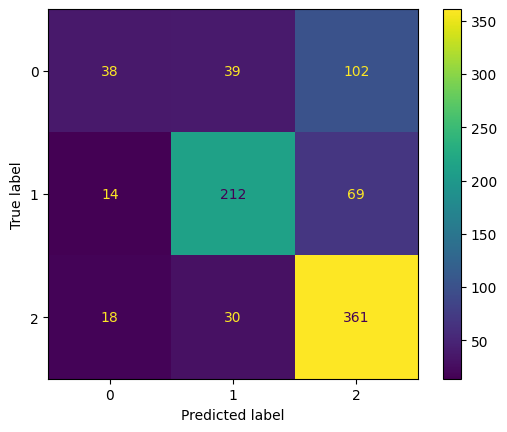

In [ ]:
# Support vector machine model pineline with TF-IDF and CountVectorizer
svm_Tfidf_Model = SVC()
svm_CountVectorizer_Model = SVC()

# Train model TF-IDF
svm_Tfidf_Model.fit(X_train_tfidf, y_train)

# Train model CountVectorizer
svm_CountVectorizer_Model.fit(X_train_countvectorizer, y_train)

# Make predictions on testing data TF-IDF
svm_Tfidf_Predictions = svm_Tfidf_Model.predict(X_test_tfidf)

# Make predictions on testing data CountVectorizer
svm_CountVectorizer_Predictions = svm_CountVectorizer_Model.predict(X_test_countvectorizer)

# Print classification report TF-IDF
print('TF-IDF Report')
print(classification_report(y_test, svm_Tfidf_Predictions))

# Print classification report CountVectorizer
print('CountVectorizer Report')
print(classification_report(y_test, svm_CountVectorizer_Predictions))

print('TF-IDF')
svm_cm_tfidf = confusion_matrix(y_test, svm_Tfidf_Predictions)
svm_disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=svm_cm_tfidf, display_labels=svm_Tfidf_Model.classes_)

svm_disp_tfidf.plot()

plt.show()

print('CountVectorizer')
svm_cm_cv = confusion_matrix(y_test, svm_CountVectorizer_Predictions)
svm_disp_cv = ConfusionMatrixDisplay(confusion_matrix=svm_cm_cv, display_labels=svm_CountVectorizer_Model.classes_)

svm_disp_cv.plot()

plt.show()

In [ ]:
test = 'vải xấu =))'

test_pre = preprocess(test)

test_pre

x_test_single = tfidfVectorizer.transform([test_pre])

x_test_single

decisionTree_Tfidf_Classifier.predict(x_test_single)

array([2])